<a href="https://colab.research.google.com/github/sudeepmenon17/PytorchforNN/blob/main/NN_for_separated_flows_over_airfoils.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [198]:
!pip install google-auth


In [199]:
from google.colab import auth
from google.colab import drive

In [200]:
auth.authenticate_user()

In [201]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [202]:
!ls /content/drive/MyDrive/Data_from_Karim/AirfoilS809/


data_set1.csv  data_set2.csv  data_set3.csv  data_set4.csv  neuralNetwork_reg.py  ReadMe.docx


In [203]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline


In [204]:
# Create a Model class
class Model(nn.Module):
  def __init__(self,in_features=5,h1 = 61, h2 = 61, out_features=1):
    super().__init__()
    self.fc1 = nn.Linear(in_features,h1)
    self.fc2 = nn.Linear(h1,h2)
    self.out = nn.Linear(h2,out_features)

  def forward(self,x):
    x = F.sigmoid(self.fc1(x))
    x = F.sigmoid(self.fc2(x))
    x = self.out(x)

    return x

In [205]:
# torch.manual_seed(42)

model = Model()

In [206]:
# Read the data set - data_set3.csv --> Airfoil S809, Re = 2e6, alpha = 14.2 deg
df = pd.read_csv("/content/drive/MyDrive/Data_from_Karim/AirfoilS809/data_set3.csv")
df


,x,y,beta,feature1,feature2,feature3,feature4,feature5
0,0.997919,0.000257,1.0,0.025984,4.740000e-07,0.923826,0.000329,2.650000e-05
1,0.997809,0.000272,1.0,0.038271,3.490000e-07,1.001367,0.000212,3.590000e-05
2,0.997977,0.000226,1.0,0.110119,7.410000e-07,1.003305,0.000105,5.586610e-04
3,0.997921,0.000260,1.0,0.238758,1.300000e-05,0.812515,0.002879,1.910810e-04
4,0.997695,0.000287,1.0,0.011320,2.930000e-07,0.997945,0.000782,2.220000e-06
...,...,...,...,...,...,...,...,...
104173,-18.143043,-2.440683,1.0,5750.002879,9.323239e-01,20.218650,0.001524,4.490000e-10
104174,-16.994571,-1.759553,1.0,449.511102,8.836077e-01,284.615589,0.000528,5.750000e-09
104175,-18.232937,-1.591567,1.0,16440.483400,9.322857e-01,5.400816,0.001364,2.930000e-10
104176,-18.177182,-2.158839,1.0,13254.034340,9.323127e-01,7.694095,0.001503,3.610000e-10


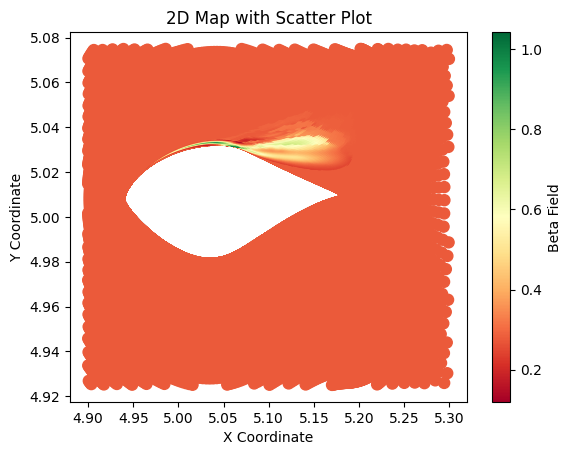

In [207]:


# Visualize beta field for Airfoil S809, Re = 2e6, alpha = 14.2deg

xc = np.array(df['x'])
yc = np.array(df['y'])
b = np.array(df['beta'])
b1 = []



# Normalize x and y coordinates
min_range = -5.0
max_range = 5.0
xc = (xc - np.min(xc)) * (max_range - min_range) / (np.max(xc) - np.min(xc))
yc = (yc - np.min(yc)) * (max_range - min_range) / (np.max(yc) - np.min(yc))

# Normalize beta field
bmin = 0.12
bmax = 1.15
b = bmin +  (b - np.min(b)) * (bmax- bmin) / (np.max(b) - np.min(b))

#####################################################################
# Cleaning the beta field in the wake region
for k in range(len(xc)):
  if xc[k] >= 5.2 and xc[k] <= 5.3:
    if yc[k] >= 4.94 and yc[k] <= 4.96:
      b1.append(b[k])

for j in range(len(xc)):
  if xc[j] > 5.2:
    b[j] = np.mean(b1)

modified_data = {
    'x': np.array(xc),
    'y': np.array(yc),
    'beta': np.array(b),
    'feature1': np.array(df['feature1']),
    'feature2': np.array(df['feature2']),
    'feature3': np.array(df['feature3']),
    'feature4': np.array(df['feature4']),
    'feature5': np.array(df['feature5'])
}

modified_df = pd.DataFrame(modified_data)
#####################################################################
nx = []
ny = []
nb = []
# Filter data for the specified range of coordinates
for i in range(len(xc)):
  if xc[i]>=4.9 and xc[i]<=5.3:
    if yc[i]>=4.925 and yc[i]<=5.075:
      nx.append(xc[i])
      ny.append(yc[i])
      nb.append(b[i])



# # Create a 2D heatmap
# plt.hexbin(nx, ny, C=nb, gridsize=5000, cmap=plt.cm.YlOrRd_r)
# plt.colorbar(label='Field Value')
# plt.xlabel('X Coordinate')
# plt.ylabel('Y Coordinate')
# plt.title('Field Visualization')
# plt.show()


# Create a scatter plot
plt.scatter(nx, ny, c=nb,  cmap= 'RdYlGn',alpha=1, marker='.',s=250)
plt.colorbar(label='Beta Field')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('2D Map with Scatter Plot')
plt.show()


# X, Y = np.meshgrid(nx, ny)

# # Create a contour plot
# plt.figure()
# contour = plt.contour(X, Y, nb, cmap='viridis')
# plt.colorbar(contour, label='Data Value')
# plt.xlabel('X Coordinate')
# plt.ylabel('Y Coordinate')
# plt.title('Contour Plot')
# plt.show()

In [208]:
# # Extract smaller data around the airfoil

# xc = np.array(df['x'])
# yc = np.array(df['y'])
# b = np.array(df['beta'])

# # Normalize x and y coordinates
# min_range = -5.0
# max_range = 5.0
# xc = (xc - np.min(xc)) * (max_range - min_range) / (np.max(xc) - np.min(xc))
# yc = (yc - np.min(yc)) * (max_range - min_range) / (np.max(yc) - np.min(yc))

# # Normalize beta field
# bmin = 0.12
# bmax = 1.15
# b = bmin +  (b - np.min(b)) * (bmax- bmin) / (np.max(b) - np.min(b))


# f1 = np.array(df['feature1'])
# f2 = np.array(df['feature2'])
# f3 = np.array(df['feature3'])
# f4 = np.array(df['feature4'])
# f5 = np.array(df['feature5'])


# nx,ny,nb,nf1,nf2,nf3,nf4,nf5 = [[] for j in range(8)]


# for i in range(len(xc)):
#   if xc[i]>=4.92 and xc[i]<=5.3:
#     if yc[i]>=4.98 and yc[i]<=5.05:
#       nx.append(xc[i])
#       ny.append(yc[i])
#       nb.append(b[i])
#       nf1.append(f1[i])
#       nf2.append(f2[i])
#       nf3.append(f3[i])
#       nf4.append(f4[i])
#       nf5.append(f5[i])

# new_data = {
#     'x': np.array(nx),
#     'y': np.array(ny),
#     'beta': np.array(nb),
#     'feature1': np.array(nf1),
#     'feature2': np.array(nf2),
#     'feature3': np.array(nf3),
#     'feature4': np.array(nf4),
#     'feature5': np.array(nf5)
# }

# new_df  = pd.DataFrame(new_data)

# new_df

In [209]:
# from sklearn.preprocessing import StandardScaler

# # Preprocess Features
# df1 = new_df.drop(['x','y'],axis=1)

# # Fill missing values with the mean
# df1 = df1.fillna(df1.mean())


# # Standardization
# standard_scaler = StandardScaler()
# df1_standardized = standard_scaler.fit_transform(df1)

# # Features
# X = df1_standardized[:,:5]
# # Target
# y = df1_standardized[:,5]





In [210]:
# criterion = nn.MSELoss()
# optimizer = torch.optim.Adam(model.parameters(),lr = 0.001)

In [211]:
# #5-Fold Cross Validation
# from sklearn import metrics

# from sklearn.model_selection import KFold
# kFold=KFold(n_splits=3,shuffle=False)

# # Initialize a list to store the evaluation scores
# scores = []
# training_cost = []
# testing_cost =[]
# iterations = 100


# for train_index,test_index in kFold.split(X):
#   print("Train Index: ", train_index, "\n")
#   print("Test Index: ", test_index)
#   print("Size of training data:", len(train_index),"\n")
#   print("Size of testing data:", len(test_index),"\n")

#   X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]


#   X_train = torch.FloatTensor(X_train)
#   X_test = torch.FloatTensor(X_test)

#   y_train = torch.FloatTensor(y_train)
#   y_test = torch.FloatTensor(y_test)


#   losses = []
#   for i in range(iterations):
#     # go forward and predict
#     y_pred = model.forward(X_train)

#     # Measure the loss
#     loss = criterion(y_pred,y_train)

#     # Keep track of the losses
#     losses.append(loss.detach().numpy())

#     # print every 10 epoch
#     if i % 10 == 0:
#       print(f'iter: {i} and loss: {loss}')

#     # Backpropagation
#     optimizer.zero_grad()
#     loss.backward()
#     optimizer.step()

#   training_cost.append(losses)

#   # Evaluate Model
#   with torch.no_grad():
#     y_eval = model.forward(X_test)
#     test_loss = criterion(y_eval,y_test)
#   testing_cost.append(test_loss)
#   scores.append(metrics.mean_squared_error(y_eval,y_test))
#   print('MSEloss: {}'.format(testing_cost))
#   print('MSE error: {}'.format(scores))

In [212]:
# plt.plot(range(iterations), training_cost[0])
# plt.plot(range(iterations), training_cost[1])
# plt.plot(range(iterations), training_cost[2])
# plt.ylabel("loss/error")
# plt.xlabel('Epoch')

In [213]:

# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.60)

# X_train = torch.FloatTensor(X_train)
# X_test = torch.FloatTensor(X_test)

# y_train = torch.FloatTensor(y_train)
# y_test = torch.FloatTensor(y_test)

In [214]:
# # Train
# epochs = 200
# losses = []
# for i in range(epochs):
#   # go forward and predict
#   y_pred = model.forward(X_train)

#   # Measure the loss
#   loss = criterion(y_pred,y_train)

#   # Keep track of the losses
#   losses.append(loss.detach().numpy())

#   # print every 10 epoch
#   if i % 10 == 0:
#     print(f'Epoch: {i} and loss: {loss}')

#   # Backpropagation
#   optimizer.zero_grad()
#   loss.backward()
#   optimizer.step()


In [215]:
# plt.plot(range(epochs), losses)
# plt.ylabel("loss/error")
# plt.xlabel('Epoch')